In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error

In [143]:
es = pd.read_csv("ES-1min.csv")
print(len(es))

ft = pd.read_csv("FT-1min.csv")
print(len(ft))

2492289
3327999


In [311]:
taus = [1,5,30,60,120,180,360]
NBINS = 201

In [312]:
def shift(series, t=1):
  dP = list()
  for i in range(len(series)-t):
    dP.append(series[i+t]-series[i])

  return np.array(dP)

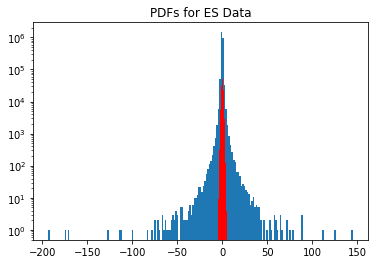

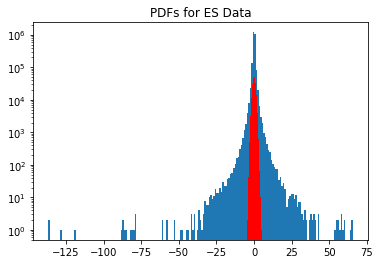

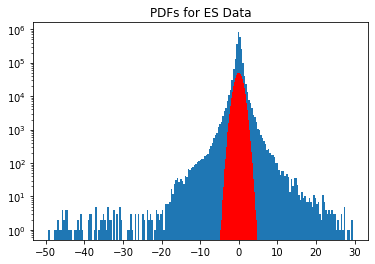

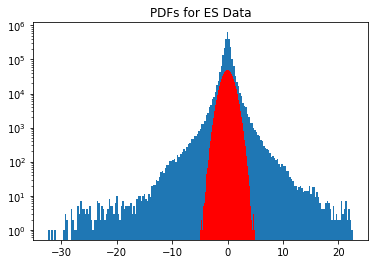

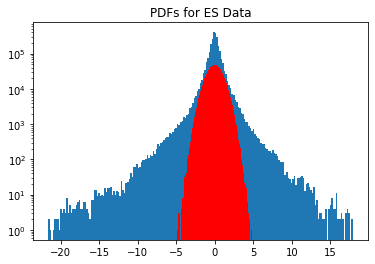

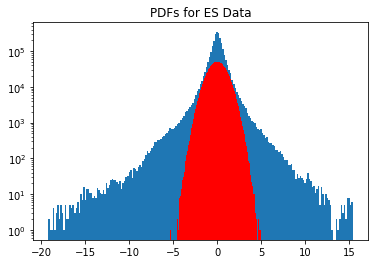

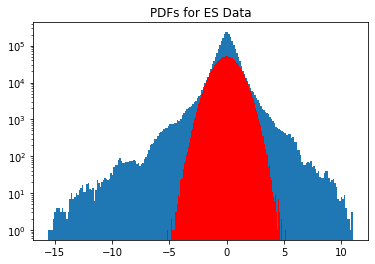

In [315]:
# Visulizations for ES data -> Sample Gaussian PDF in red and Sample Levy in blue
for t in taus:
  currdp = shift(es.Close, t)

  scaler = StandardScaler()
  currdp_scaled = scaler.fit_transform(currdp.reshape(-1,1))

  sample_std = np.std(currdp_scaled)
  sample_mean = np.mean(currdp_scaled)
  currgauss = np.random.normal(sample_mean, sample_std, len(currdp_scaled))

  plt.hist(currdp_scaled, bins = NBINS, label = "Sample Levy PDF(delta_p, tau)")
  plt.hist(currgauss, color = 'red', bins = NBINS, label = "Sample Gaussian PDF(delta_p, tau)")
  plt.yscale("log")
  plt.title('PDFs for ES Data')
  plt.show()

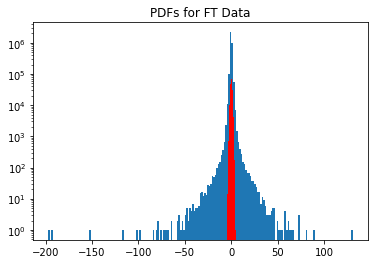

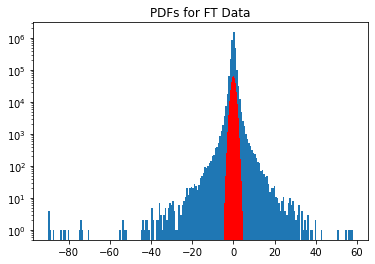

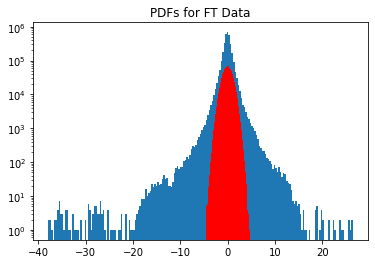

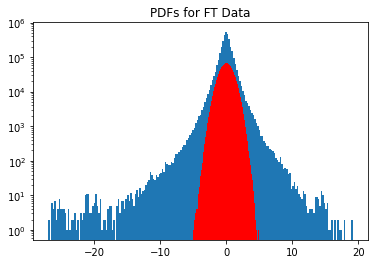

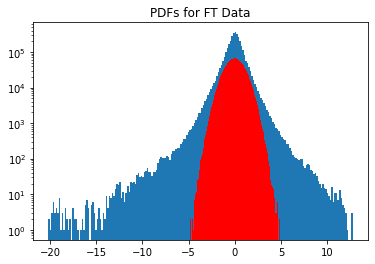

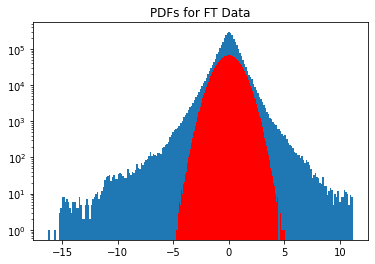

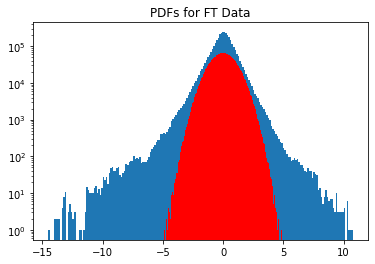

In [318]:
# visulizations for FT data -> Sample Gaussian PDF in red and Sample Levy in blue
for t in taus:
  currdp = shift(ft.Close, t)

  scaler = StandardScaler()
  currdp_scaled = scaler.fit_transform(currdp.reshape(-1,1))

  sample_std = np.std(currdp_scaled)
  sample_mean = np.mean(currdp_scaled)
  currgauss = np.random.normal(sample_mean, sample_std, len(currdp_scaled))

  plt.hist(currdp_scaled, bins = NBINS, label = "Sample Levy PDF(delta_p, tau)")
  plt.hist(currgauss, color = 'red', bins = NBINS, label = "Sample Gaussian PDF(delta_p, tau)")
  plt.yscale("log")
  plt.title('PDFs for FT Data')
  plt.show()

In [331]:
# ES data
# estimate alpha of stable distribution based on empirical probabilities (pdf(delta_p = 0))
# calculate empirical probability for tau = 1,4,7...,499
empirical_prob_delta_p_0_es = []
tau_vec = np.arange(1, 500, 3)
for i in tau_vec:
    
    tau = i

    es_shift = es['Close'].shift(tau, axis = 0)
    delta_es = es['Close'] - es_shift
    delta_es_series = pd.Series(data = delta_es)
    delta_es_series = delta_es_series.dropna()
    
    # calculate empirical prob (sum(delta_p = 0) / len(data))
    prob_es = (delta_es_series.values == 0).sum() / len(es)
    
    empirical_prob_delta_p_0_es.append(prob_es)

Text(0, 0.5, 'log(prob_empirical)')

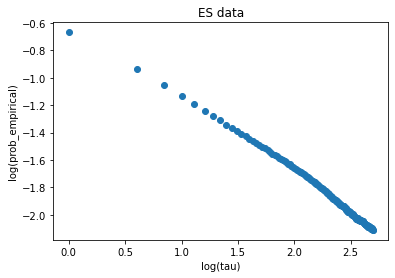

In [332]:
# log over all probs 
log_prob = np.log10(empirical_prob_delta_p_0_es)

# log over all taus
log_tau = np.log10(tau_vec)

# create a figure and axis
fig, ax = plt.subplots()

# scatter the log tau against log sd
ax.scatter(log_tau, log_prob)

# set a title and labels
ax.set_title('ES data')
ax.set_xlabel('log(tau)')
ax.set_ylabel('log(prob_empirical)')

In [333]:
# fit lin model over all log probs and taus to estimate alpha abs(1 / beta)

y_1 = log_prob.reshape(-1, 1)
X = log_tau.reshape(-1, 1)

reg1 = LinearRegression().fit(X, y_1)

print("Estimated Alpha:", abs((reg1.coef_[0])**(-1)))
y_pred1 = reg1.predict(X)
print("R2:",r2_score(y_1, y_pred1))

Estimated Alpha: [1.71768223]
R2: 0.9928869148432626


In [334]:
# FT data
# estimate alpha of stable distribution based on empirical probabilities (pdf(delta_p = 0))
# calculate empirical probability for tau = 1,4,7...,499
empirical_prob_delta_p_0_ft = []
tau_vec = np.arange(1, 500, 3)
for i in tau_vec:
    
    tau = i

    ft_shift = ft['Close'].shift(tau, axis = 0)
    delta_ft = ft['Close'] - ft_shift
    delta_ft_series = pd.Series(data = delta_ft)
    delta_ft_series = delta_ft_series.dropna()
    
    # calculate empirical prob (sum(delta_p = 0) / len(data))
    prob_ft = (delta_ft_series.values == 0).sum() / len(ft)
    
    empirical_prob_delta_p_0_ft.append(prob_ft)

Text(0, 0.5, 'log(prob_empirical)')

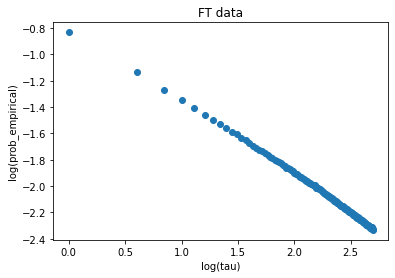

In [336]:
# log over all probs 
log_prob_ft = np.log10(empirical_prob_delta_p_0_ft)

# log over all taus
log_tau = np.log10(tau_vec)

# create a figure and axis
fig, ax = plt.subplots()

# scatter the log tau against log sd
ax.scatter(log_tau, log_prob_ft)

# set a title and labels
ax.set_title('FT data')
ax.set_xlabel('log(tau)')
ax.set_ylabel('log(prob_empirical)')

In [337]:
# fit lin model over all log probs and taus to estimate alpha abs(1 / beta)

y_1 = log_prob_ft.reshape(-1, 1)
X = log_tau.reshape(-1, 1)

reg1 = LinearRegression().fit(X, y_1)

print("Estimated Alpha:", abs((reg1.coef_[0])**(-1)))
y_pred1 = reg1.predict(X)
print("R2:",r2_score(y_1, y_pred1))

Estimated Alpha: [1.72787736]
R2: 0.9978253462872163


In [1]:
from IPython.display import display, Math, Latex

We use the property that the Levy pdf in x = delta_p = 0 is defined as follows:

In [2]:
display(Math(r'P_{\alpha, \gamma}(0, \tau) = (\gamma \tau)^{-\frac{1}{\alpha}} \frac{1}{\pi \alpha} \Gamma(\frac{1}{\alpha})'))
display(Math(r'\Rightarrow \log(P_{\alpha, \gamma}(0, \tau)) = \log((\gamma \tau)^{-\frac{1}{\alpha}} \frac{1}{\pi \alpha} \Gamma(\frac{1}{\alpha}))'))
display(Math(r'\Leftrightarrow \log(P_{\alpha, \gamma}(0, \tau)) = -\frac{1}{\alpha} \log(\gamma \tau) - \log(\pi \alpha) + \log(\Gamma(\frac{1}{\alpha}))'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We approximate the relationship above by plotting the log-emperical probablities that price fluctuations are 0 for a given log-tau. The only term in the relationship above which depends on tau is the leading term scaled by (-1/alpha). Therefore we approximate alpha by beta (estimation of coefficient through OLS) = abs(1 / beta).